In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np
import contextily as ctx
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase

In [2]:
# Load the average variance predictions
predictions = pd.read_csv(
    "../hazard_outputs/4179_training_eqs_500_epochs_no_source/testing/site_variances.csv"
)

# predictions = pd.read_csv(
#     "../hazard_outputs/400_training_eqs_2000_epochs_no_source(400candidateCondition)/site_variances.csv"
# )

In [3]:
predictions_gdf = gpd.GeoDataFrame(
    predictions,
    geometry=gpd.points_from_xy(predictions.site_lon, predictions.site_lat),
    crs="EPSG:4326",
)

Text(0.5, 1.0, 'NGMM Variance of log(SA(2.0s)) Predictions')

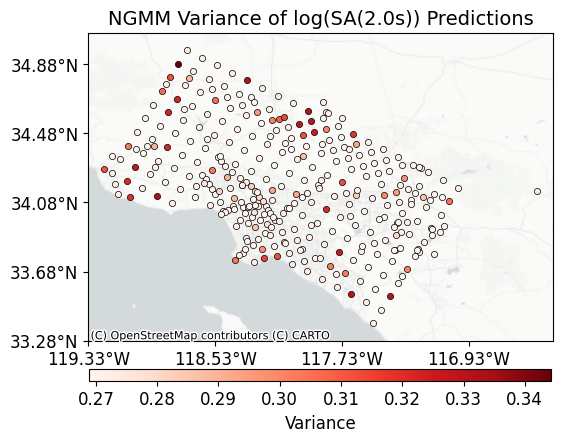

In [5]:
fig, ax = plt.subplots(figsize=(6, 4))
cmap = plt.cm.Reds
vmin = predictions_gdf['ngmm_var'].min()
vmax = predictions_gdf['ngmm_var'].max()
# vmin = 0.270478 # min of 4179 training eqs
# vmax = 0.620341 # max of 400 training eqs
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = ScalarMappable(norm=norm, cmap=cmap)
for i in predictions_gdf.index:
    color = mapper.to_rgba(predictions_gdf.loc[i, 'ngmm_var'])
    ax.scatter(predictions_gdf.loc[i, 'site_lon'], predictions_gdf.loc[i, 'site_lat'], color=color, 
               edgecolor = 'k', linewidths=0.5, s=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, crs = 4326)  # Change provider if needed

xmin = min(predictions_gdf['site_lon'])-0.1
xmax = max(predictions_gdf['site_lon'])+0.1
ymin = min(predictions_gdf['site_lat'])-0.1
ymax = max(predictions_gdf['site_lat'])+0.1

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks(np.arange(xmin, xmax, 0.8))
ax.set_yticks(np.arange(ymin, ymax, 0.4))
ax.set_xticklabels([f'{-x:.2f}°W' for x in ax.get_xticks().tolist()], fontsize=12)
ax.set_yticklabels([f'{x:.2f}°N' for x in ax.get_yticks().tolist()], fontsize=12)

# cax = fig.add_axes([0.27, 0.05, 0.5, 0.03]) # posititon
cax = fig.add_axes([0.127, 0.01, 0.77, 0.03]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Variance', fontsize=12)
cb.ax.tick_params(labelsize=12)

ax.set_title('NGMM Variance of log(SA(2.0s)) Predictions', fontsize=14)

Text(0.5, 1.0, 'GMM Variance of log(SA(2.0s)) Predictions')

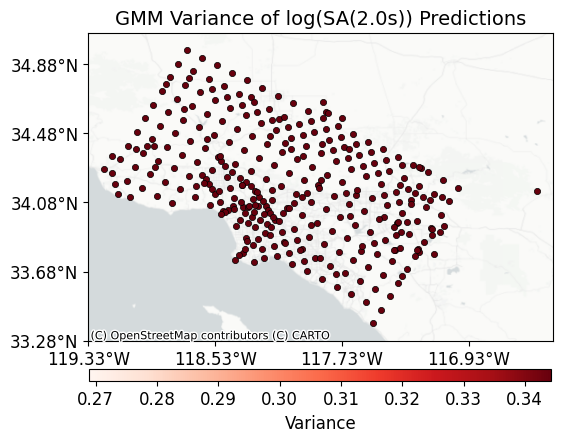

In [15]:
fig, ax = plt.subplots(figsize=(6, 4))
cmap = plt.cm.Reds
vmin = predictions_gdf['ngmm_var'].min()
vmax = predictions_gdf['ngmm_var'].max()
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = ScalarMappable(norm=norm, cmap=cmap)
for i in predictions_gdf.index:
    color = mapper.to_rgba(predictions_gdf.loc[i, 'gmm_var'])
    ax.scatter(predictions_gdf.loc[i, 'site_lon'], predictions_gdf.loc[i, 'site_lat'], color=color, 
               edgecolor = 'k', linewidths=0.5, s=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, crs = 4326)  # Change provider if needed

xmin = min(predictions_gdf['site_lon'])-0.1
xmax = max(predictions_gdf['site_lon'])+0.1
ymin = min(predictions_gdf['site_lat'])-0.1
ymax = max(predictions_gdf['site_lat'])+0.1

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks(np.arange(xmin, xmax, 0.8))
ax.set_yticks(np.arange(ymin, ymax, 0.4))
ax.set_xticklabels([f'{-x:.2f}°W' for x in ax.get_xticks().tolist()], fontsize=12)
ax.set_yticklabels([f'{x:.2f}°N' for x in ax.get_yticks().tolist()], fontsize=12)

# cax = fig.add_axes([0.27, 0.05, 0.5, 0.03]) # posititon
cax = fig.add_axes([0.127, 0.01, 0.77, 0.03]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Variance', fontsize=12)
cb.ax.tick_params(labelsize=12)

ax.set_title('GMM Variance of log(SA(2.0s)) Predictions', fontsize=14)

Text(0.5, 1.0, 'GMM Empirical Variance of log(SA(2.0s)) Predictions')

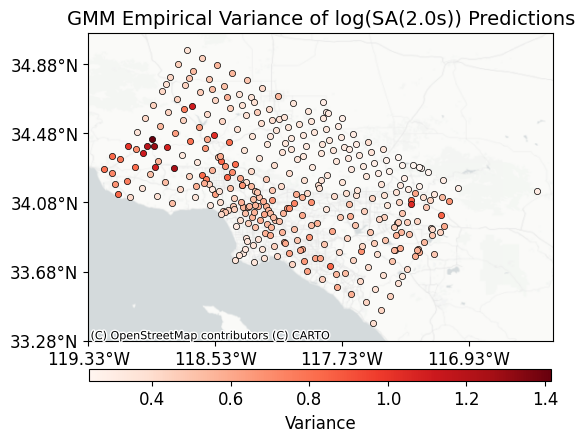

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))
cmap = plt.cm.Reds
vmin = predictions_gdf['gmm_empirical_var'].min()
vmax = predictions_gdf['gmm_empirical_var'].max()
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = ScalarMappable(norm=norm, cmap=cmap)
for i in predictions_gdf.index:
    color = mapper.to_rgba(predictions_gdf.loc[i, 'gmm_empirical_var'])
    ax.scatter(predictions_gdf.loc[i, 'site_lon'], predictions_gdf.loc[i, 'site_lat'], color=color, 
               edgecolor = 'k', linewidths=0.5, s=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, crs = 4326)  # Change provider if needed

xmin = min(predictions_gdf['site_lon'])-0.1
xmax = max(predictions_gdf['site_lon'])+0.1
ymin = min(predictions_gdf['site_lat'])-0.1
ymax = max(predictions_gdf['site_lat'])+0.1

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks(np.arange(xmin, xmax, 0.8))
ax.set_yticks(np.arange(ymin, ymax, 0.4))
ax.set_xticklabels([f'{-x:.2f}°W' for x in ax.get_xticks().tolist()], fontsize=12)
ax.set_yticklabels([f'{x:.2f}°N' for x in ax.get_yticks().tolist()], fontsize=12)

# cax = fig.add_axes([0.27, 0.05, 0.5, 0.03]) # posititon
cax = fig.add_axes([0.127, 0.01, 0.77, 0.03]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Variance', fontsize=12)
cb.ax.tick_params(labelsize=12)

ax.set_title('GMM Empirical Variance of log(SA(2.0s)) Predictions', fontsize=14)

In [17]:
predictions_gdf['gmm_empirical_var'] = predictions_gdf['gmm_empirical_var'].mean()
print(predictions_gdf['gmm_empirical_var'].mean())

0.49570391587403734


Text(0.5, 1.0, 'GMM Empirical Variance of log(SA(2.0s)) Predictions')

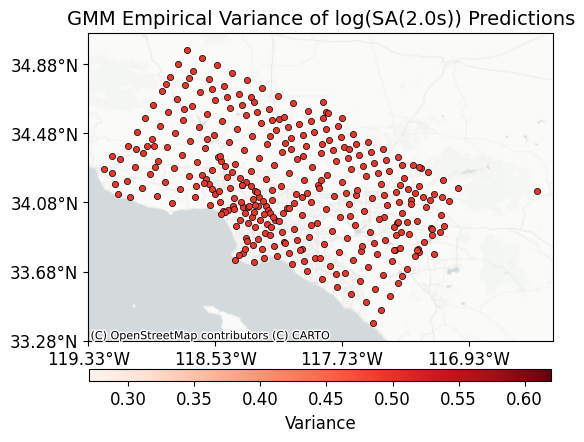

In [18]:
fig, ax = plt.subplots(figsize=(6, 4))
cmap = plt.cm.Reds
# vmin = predictions_gdf['gmm_empirical_var'].min()
# vmax = predictions_gdf['gmm_empirical_var'].max()
vmin = 0.270478 # min of 4179 training eqs
vmax = 0.620341 # max of 400 training eqs
norm = Normalize(vmin=vmin, vmax=vmax)
mapper = ScalarMappable(norm=norm, cmap=cmap)
for i in predictions_gdf.index:
    color = mapper.to_rgba(predictions_gdf.loc[i, 'gmm_empirical_var'])
    ax.scatter(predictions_gdf.loc[i, 'site_lon'], predictions_gdf.loc[i, 'site_lat'], color=color, 
               edgecolor = 'k', linewidths=0.5, s=20)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.PositronNoLabels, crs = 4326)  # Change provider if needed

xmin = min(predictions_gdf['site_lon'])-0.1
xmax = max(predictions_gdf['site_lon'])+0.1
ymin = min(predictions_gdf['site_lat'])-0.1
ymax = max(predictions_gdf['site_lat'])+0.1

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks(np.arange(xmin, xmax, 0.8))
ax.set_yticks(np.arange(ymin, ymax, 0.4))
ax.set_xticklabels([f'{-x:.2f}°W' for x in ax.get_xticks().tolist()], fontsize=12)
ax.set_yticklabels([f'{x:.2f}°N' for x in ax.get_yticks().tolist()], fontsize=12)

# cax = fig.add_axes([0.27, 0.05, 0.5, 0.03]) # posititon
cax = fig.add_axes([0.127, 0.01, 0.77, 0.03]) # posititon
cb = ColorbarBase(cax,cmap=cmap,norm=norm, orientation='horizontal')
cb.ax.set_xlabel('Variance', fontsize=12)
cb.ax.tick_params(labelsize=12)

ax.set_title('GMM Empirical Variance of log(SA(2.0s)) Predictions', fontsize=14)